<a href="https://colab.research.google.com/github/naveedw/Deeplearning/blob/main/Fashion-MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing needed libraries

Here we just import libraries from which we will need functions later. Please have a look at [Keras](https://Keras.io)

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

from __future__ import print_function
from datetime import datetime
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, BatchNormalization, Activation, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import *
from keras.callbacks import EarlyStopping
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold
import keras.backend as K
from keras.wrappers.scikit_learn import KerasClassifier

# Utility functions
We created this function in order to help us to display loss function value and accuracy of our neural network model

In [3]:
def plot_loss_accuracy(history):
    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(10, 8))
    historydf.plot(ylim=(0, max(1, historydf.values.max())))
    loss = history.history['loss'][-1]
    acc = history.history['accuracy'][-1]
    plt.title('Loss: %.3f, Accuracy: %.3f' % (loss, acc))

# Main section

We will be using the MNIST dataset, which is built into Keras.
[FASHION-MNIST](https://keras.io/api/datasets/fashion_mnist/)

In [4]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


First of all we need to know what the size of the data we are dealing with is. \\
x_train, y_train, x_test and y_test are all numpy arrays, so we can just have a look at the shape attribute of each of them.
[More info on Numpy](https://www.numpy.org/)

In [5]:
print("Training data shape: ", x_train.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", x_test.shape) # (10000, 28, 28) -- 10000 images, each 28x28
print("Training response shape:, ", y_train.shape)
print("Testing response shape: ", y_test.shape)

image_size = (x_train.shape[1], x_train.shape[2])


Training data shape:  (60000, 28, 28)
Test data shape (10000, 28, 28)
Training response shape:,  (60000,)
Testing response shape:  (10000,)


Let's display one image from MNIST

You will see a digit 5

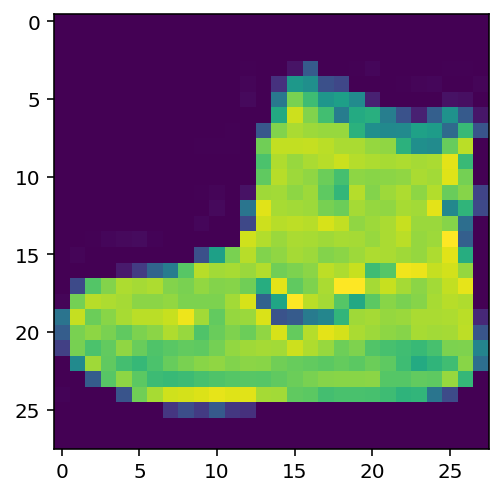

In [6]:
plt.imshow(x_train[0])

This shows that we have 28 * 28 dimensional images with 60000 training images and 10000 testing images. \\
Next, in order to use a fully connected network to classify the images we need to convert these 28 * 28 images into vectors. \\
This can be done easily using the reshape function in numpy. [See this manual for more information of reshape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html) \\

In [7]:
# Flatten the images
image_vector_size = image_size[0] * image_size[1] # 28 * 28
x_train = x_train.reshape(x_train.shape[0], image_vector_size) /255.
x_test = x_test.reshape(x_test.shape[0], image_vector_size) /255.
print(x_train.shape)

(60000, 784)


The final step in the data preparation is to convert the integer labels (target labels, what we want to predict) to one-hot encoded labels. \\
We convert labels "0", "1",...,"9" into vectors 1000000, 0100000,...,0000001. \\
Keras has a built in function that does this named to_categorical. \\
Be careful here, if you run this section of code more than once then you might one-hot-encode your one-hot-encoded labels!

In [8]:
print("First 5 training labels: ", y_train[:5]) # [9 0 0 3 0]

# Convert to "one-hot" vectors using the to_categorical function
num_classes = 10 
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
print("First 5 training lables as one-hot encoded vectors:\n", y_train[:5])
print(y_train.shape)

First 5 training labels:  [9 0 0 3 0]
First 5 training lables as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(60000, 10)


Next we want to initialize our neural network model. \\
We start by defining the model from the Sequential() function and adding some Dense (fully-connected) layers. \\
Please note that we don't explicitly add an input layer! It's a parameter of the first Dense Layer - input_shape.
Here we will be starting with a simple network with just a single hidden layer with 32 neurons. \\
Make sure you set the size of the output layer to be the number of classes that we are trying to predict! \\
We can have a look at out model using the model.summary() function.

In [9]:
image_size = 784 # 28*28
#num_classes = 10 # ten unique digits
def build_basic_model():
  model = Sequential()

  # The input layer requires the special input_shape parameter which should match
  # the shape of our training data.
  model.add(Dense(units=32, activation='sigmoid', input_shape=(image_vector_size,)))
  model.add(Dense(units=num_classes, activation='softmax'))
  return model


In [10]:
#model = build_basic_model()
#model = build_dropout_model()
model = build_basic_model() 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [11]:
def build_dropout_model():
  model = Sequential()

  # The input layer requires the special input_shape parameter which should match
  # the shape of our training data.
  model.add(Dense(units=32, activation='sigmoid', input_shape=(image_vector_size,)))
  model.add(Dropout(0.2))
  model.add(Dense(units=num_classes, activation='softmax'))
  return model

def build_deeper_model():
  model = Sequential()
  model.add(Dense(units=64, activation='sigmoid', input_shape=(image_vector_size,)))
  model.add(Dense(units=32, activation='sigmoid'))
  model.add(Dense(units=num_classes, activation='softmax'))
  return model


In [ ]:
# for build_basic_model()

#model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
#model.compile(SGD(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])  #0.886
#model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy']) #0.906
#model.compile('nadam', loss='categorical_crossentropy', metrics=['accuracy'])  #0.907,0.906

#history = model.fit(x_train, y_train, batch_size=128, epochs=5, verbose=True, validation_split=.1)  # 0.711
#history = model.fit(x_train, y_train, batch_size=128, epochs=50, verbose=True, validation_split=.1)  # 0.834
#history = model.fit(x_train, y_train, batch_size=32, epochs=20, verbose=True, validation_split=.1)  # 0.860 but plot not good
#history = model.fit(x_train, y_train, batch_size=64, epochs=25, verbose=True, validation_split=.1)  # 0.835


In [12]:
opt_dict = {'nadam':Nadam,
            'adam':Adam,
            'sgd':SGD,
            'rmsprop':RMSprop,
            'adadelta':Adadelta,
            'adagrad':Adagrad}


# set all the following values yourself
optimizer_name  = 'adam' 
#learning_rate = 0.01  
batch_size = 64 
training_epochs = 25 

# selects optimizer and sets learning rate
#optimizer = opt_dict[optimizer_name](lr=learning_rate)
#model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

#selects optimizer without learning rate
model.compile(optimizer_name, loss='categorical_crossentropy', metrics=['accuracy']) # basic 0.905, dropout 0.807 , deeper 0.923


history = model.fit(x_train, y_train, batch_size=batch_size, epochs=training_epochs, verbose=True, validation_split=.1)
loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)

Epoch 1/25
844/844 [==============================] - 16s 3ms/step - loss: 1.1380 - accuracy: 0.6723 - val_loss: 0.5290 - val_accuracy: 0.8205
Epoch 2/25
844/844 [==============================] - 2s 2ms/step - loss: 0.4971 - accuracy: 0.8336 - val_loss: 0.4394 - val_accuracy: 0.8447
Epoch 3/25
844/844 [==============================] - 2s 2ms/step - loss: 0.4336 - accuracy: 0.8490 - val_loss: 0.4111 - val_accuracy: 0.8500
Epoch 4/25
844/844 [==============================] - 2s 3ms/step - loss: 0.3982 - accuracy: 0.8582 - val_loss: 0.3893 - val_accuracy: 0.8563
Epoch 5/25
844/844 [==============================] - 2s 2ms/step - loss: 0.3844 - accuracy: 0.8636 - val_loss: 0.3797 - val_accuracy: 0.8638
Epoch 6/25
844/844 [==============================] - 2s 2ms/step - loss: 0.3640 - accuracy: 0.8702 - val_loss: 0.3658 - val_accuracy: 0.8650
Epoch 7/25
844/844 [==============================] - 2s 3ms/step - loss: 0.3529 - accuracy: 0.8751 - val_loss: 0.3592 - val_accuracy: 0.8700
Epoch

Test loss: 0.36
Test accuracy: 0.874


<Figure size 720x576 with 0 Axes>

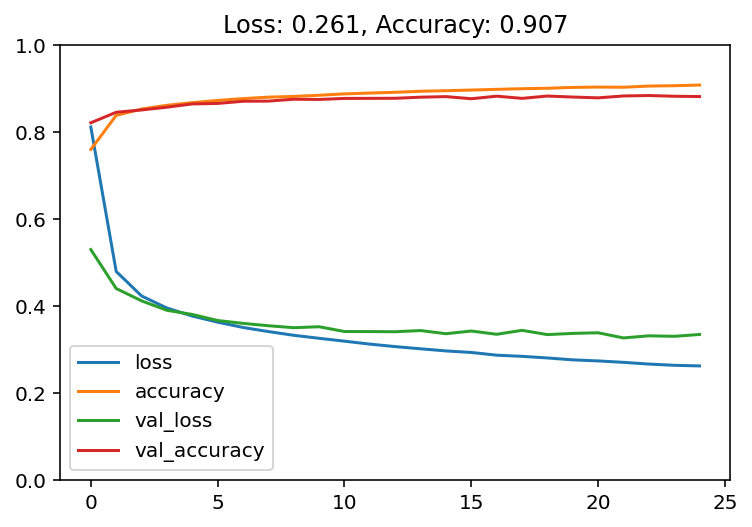

In [13]:
plot_loss_accuracy(history)
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

In [14]:
#We use this code to free up some RAM
import gc
gc.collect()
del(history)

# CNN

In [16]:
from keras.datasets import fashion_mnist
from matplotlib import pyplot

In [17]:
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = fashion_mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D(2, 2))
	model.add(Conv2D(16, (3, 3), activation = 'relu', padding='same'))
	model.add(Flatten())
	model.add(Dense(100, activation='relu'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.01)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model


In [18]:

# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = define_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc))
		# append scores
		scores.append(acc)
		histories.append(history)
	return scores, histories


> 0.893
> 0.892
> 0.897
> 0.892
> 0.894


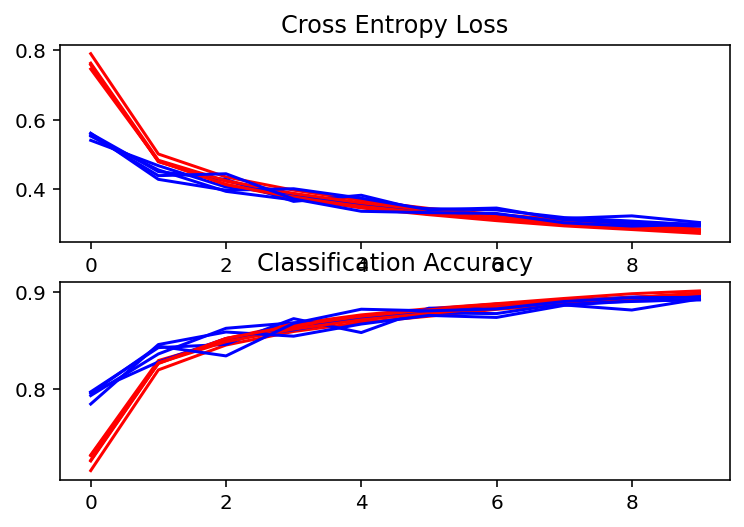

In [19]:

# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		pyplot.subplot(211)
		pyplot.title('Cross Entropy Loss')
		pyplot.plot(histories[i].history['loss'], color='red', label='train')
		pyplot.plot(histories[i].history['val_loss'], color='blue', label='test')
		# plot accuracy
		pyplot.subplot(212)
		pyplot.title('Classification Accuracy')
		pyplot.plot(histories[i].history['accuracy'], color='red', label='train')
		pyplot.plot(histories[i].history['val_accuracy'], color='blue', label='test')
	pyplot.show()
 
 
 # run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# evaluate model
	scores, histories = evaluate_model(trainX, trainY)
	# learning curves
	summarize_diagnostics(histories)

 
# entry point, run the test harness
run_test_harness()

> 0.919
> 0.920
> 0.915
> 0.915
> 0.915


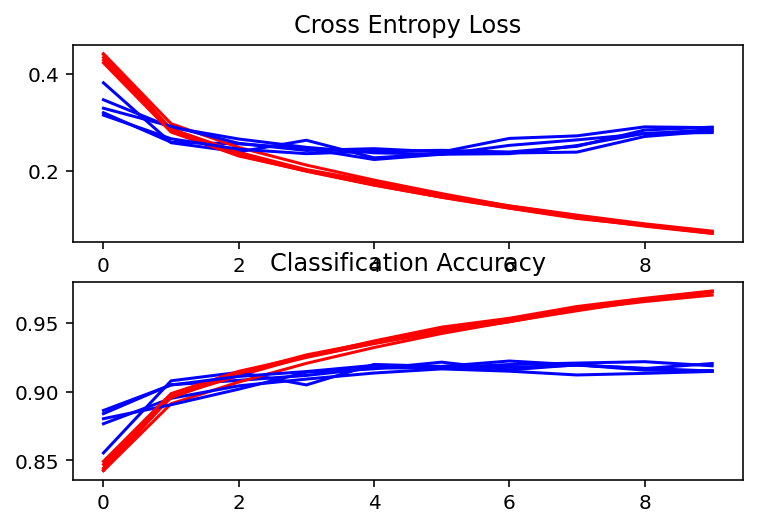

In [20]:
# opt ='adam' > opt = SGD(lr=0.01)


# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = fashion_mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D(2, 2))
	model.add(Conv2D(16, (3, 3), activation = 'relu', padding='same'))
	model.add(Flatten())
	model.add(Dense(100, activation='relu'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	#opt = Adam(lr=0.0001)
	model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
	return model

# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = define_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc))
		# append scores
		scores.append(acc)
		histories.append(history)
	return scores, histories

# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		pyplot.subplot(211)
		pyplot.title('Cross Entropy Loss')
		pyplot.plot(histories[i].history['loss'], color='red', label='train')
		pyplot.plot(histories[i].history['val_loss'], color='blue', label='test')
		# plot accuracy
		pyplot.subplot(212)
		pyplot.title('Classification Accuracy')
		pyplot.plot(histories[i].history['accuracy'], color='red', label='train')
		pyplot.plot(histories[i].history['val_accuracy'], color='blue', label='test')
	pyplot.show()
 
 
 # run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# evaluate model
	scores, histories = evaluate_model(trainX, trainY)
	# learning curves
	summarize_diagnostics(histories)

 
# entry point, run the test harness
run_test_harness()

> 0.920
> 0.921
> 0.918
> 0.919
> 0.923


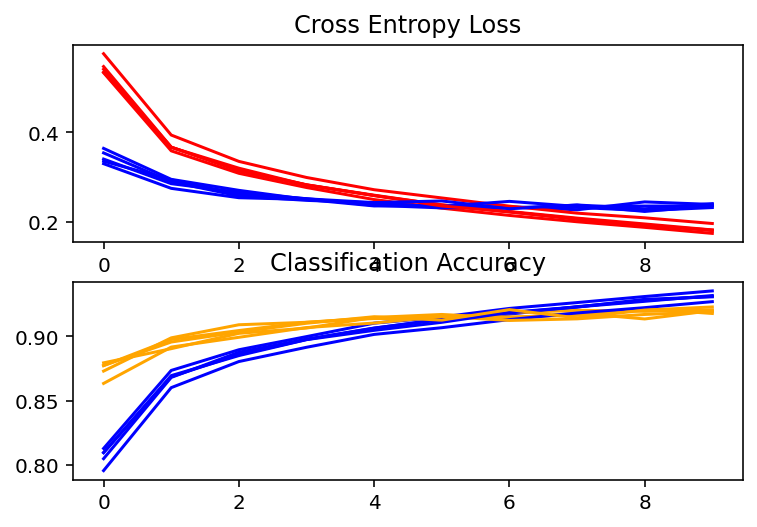

In [21]:
# although the score gets higher, but curve of ['val_loss'] shows overfitting, because parameters much more than traing data

# so add dropout layer model.add(Dropout(0.5)) # 

# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = fashion_mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D(2, 2))
	model.add(Conv2D(16, (3, 3), activation = 'relu', padding='same'))
	model.add(Flatten())
	model.add(Dense(100, activation='relu'))
	model.add(Dropout(0.5))
	model.add(Dense(10, activation='softmax'))
	# compile model
	model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
	return model

# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = define_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc))
		# append scores
		scores.append(acc)
		histories.append(history)
	return scores, histories

# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		pyplot.subplot(211)
		pyplot.title('Cross Entropy Loss')
		pyplot.plot(histories[i].history['loss'], color='red', label='train')
		pyplot.plot(histories[i].history['val_loss'], color='blue', label='test')
		# plot accuracy
		pyplot.subplot(212)
		pyplot.title('Classification Accuracy')
		pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
	pyplot.show()
 
 
 # run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# evaluate model
	scores, histories = evaluate_model(trainX, trainY)
	# learning curves
	summarize_diagnostics(histories)

 
# entry point, run the test harness
run_test_harness()

> 0.916
> 0.920
> 0.921
> 0.920
> 0.922


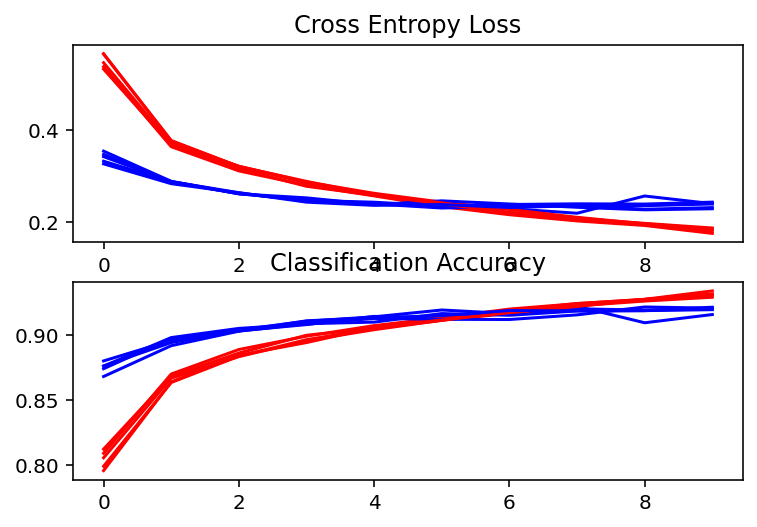

In [22]:
# Increasing the number of Filters 64 than 32, not improve 

# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = fashion_mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

# define cnn model
def define_model():
  model = Sequential()
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D(2, 2))
  model.add(Conv2D(16, (3, 3), activation = 'relu', padding='same'))
  model.add(Flatten())
  model.add(Dense(100, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))
	# compile model
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = define_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc))
		# append scores
		scores.append(acc)
		histories.append(history)
	return scores, histories

# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		pyplot.subplot(211)
		pyplot.title('Cross Entropy Loss')
		pyplot.plot(histories[i].history['loss'], color='red', label='train')
		pyplot.plot(histories[i].history['val_loss'], color='blue', label='test')
		# plot accuracy
		pyplot.subplot(212)
		pyplot.title('Classification Accuracy')
		pyplot.plot(histories[i].history['accuracy'], color='red', label='train')
		pyplot.plot(histories[i].history['val_accuracy'], color='blue', label='test')
	pyplot.show()
 
 
 # run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# evaluate model
	scores, histories = evaluate_model(trainX, trainY)
	# learning curves
	summarize_diagnostics(histories)

 
# entry point, run the test harness
run_test_harness()

> 0.914
> 0.919
> 0.918
> 0.914
> 0.922


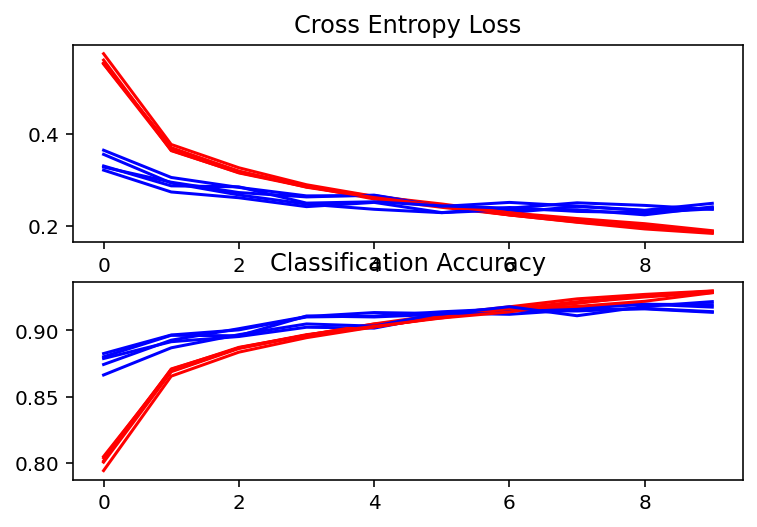

In [23]:
# keep same number of Filters 32, Increasing kernel (5×5), not imporved

# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = fashion_mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

# define cnn model
def define_model():
  model = Sequential()
  model.add(Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D(2, 2))
  model.add(Conv2D(16, (5, 5), activation = 'relu', padding='same'))
  model.add(Flatten())
  model.add(Dense(100, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))
	# compile model
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = define_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc))
		# append scores
		scores.append(acc)
		histories.append(history)
	return scores, histories

# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		pyplot.subplot(211)
		pyplot.title('Cross Entropy Loss')
		pyplot.plot(histories[i].history['loss'], color='red', label='train')
		pyplot.plot(histories[i].history['val_loss'], color='blue', label='test')
		# plot accuracy
		pyplot.subplot(212)
		pyplot.title('Classification Accuracy')
		pyplot.plot(histories[i].history['accuracy'], color='red', label='train')
		pyplot.plot(histories[i].history['val_accuracy'], color='blue', label='test')
	pyplot.show()
 
 
 # run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# evaluate model
	scores, histories = evaluate_model(trainX, trainY)
	# learning curves
	summarize_diagnostics(histories)

 
# entry point, run the test harness
run_test_harness()

> 0.915
> 0.919
> 0.914
> 0.923
> 0.917


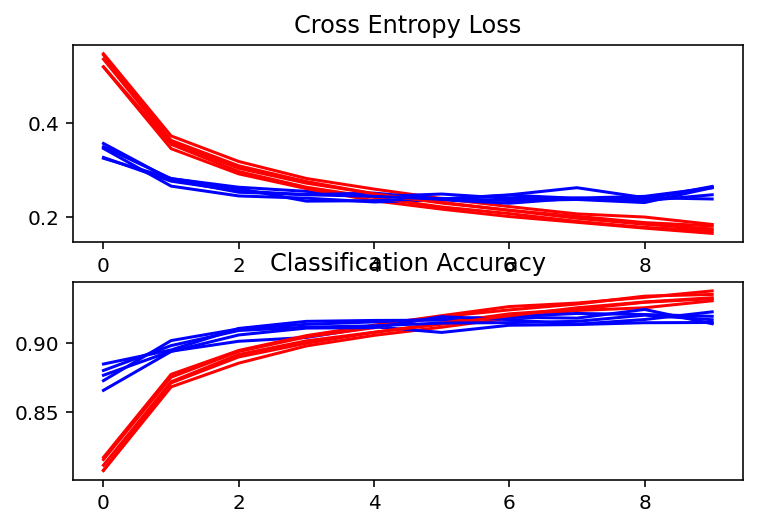

In [24]:
# epochs=10, batch_size=32 ---> epochs=10, batch_size=16, not suitable too slow !!

# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = fashion_mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

# define cnn model
def define_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D(2, 2))
  model.add(Conv2D(16, (3, 3), activation = 'relu', padding='same'))
  model.add(Flatten())
  model.add(Dense(100, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))
	# compile model
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = define_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=10, batch_size=16, validation_data=(testX, testY), verbose=0)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc))
		# append scores
		scores.append(acc)
		histories.append(history)
	return scores, histories

# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		pyplot.subplot(211)
		pyplot.title('Cross Entropy Loss')
		pyplot.plot(histories[i].history['loss'], color='red', label='train')
		pyplot.plot(histories[i].history['val_loss'], color='blue', label='test')
		# plot accuracy
		pyplot.subplot(212)
		pyplot.title('Classification Accuracy')
		pyplot.plot(histories[i].history['accuracy'], color='red', label='train')
		pyplot.plot(histories[i].history['val_accuracy'], color='blue', label='test')
	pyplot.show()
 
 
 # run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# evaluate model
	scores, histories = evaluate_model(trainX, trainY)
	# learning curves
	summarize_diagnostics(histories)

 
# entry point, run the test harness
run_test_harness()